In [2]:
!pip install sympy>=1.10
!pip install lcapy

!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 8.8 MB/s 
     |████████████████████████████████| 6.4 MB 43.5 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.4 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=f6b32d534a5d21a3d612b5e03a2d0088a2a48a930b996d6fca6a4eadb7362911
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Looking in indexes: https://pypi.org/simple, htt

# **Runtime--->Restart Runtime**

In [1]:
from lcapy import Circuit, t, pi

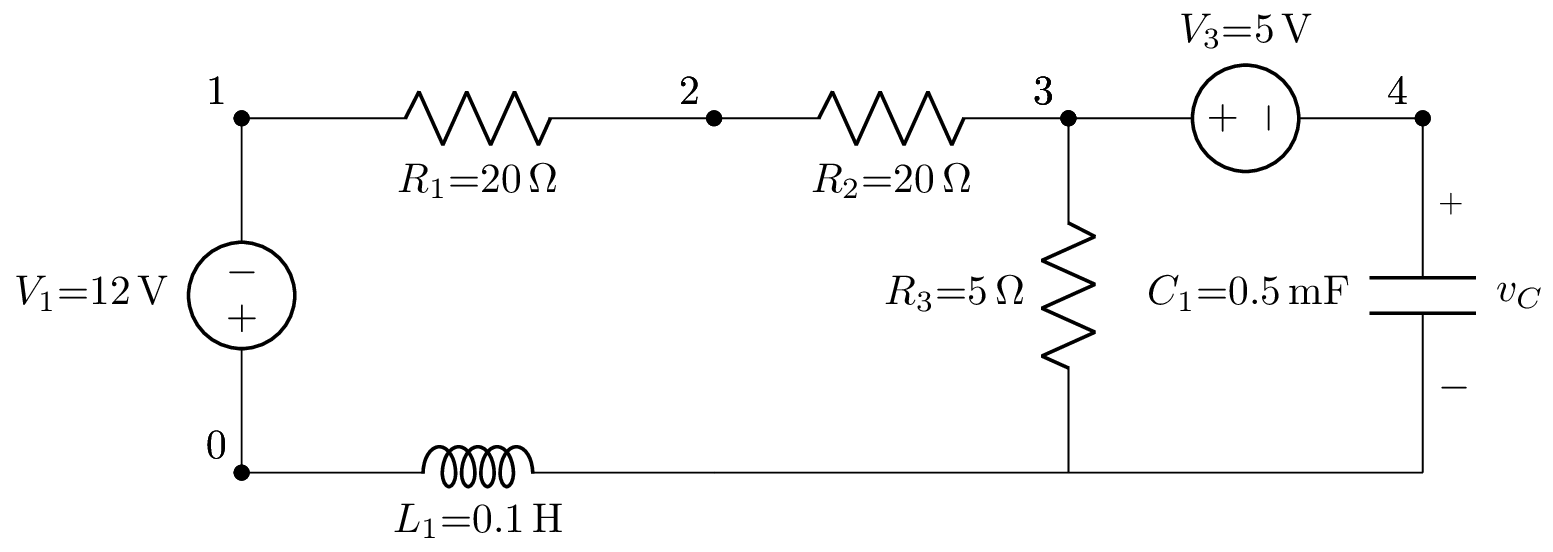

In [2]:
cct1 = Circuit("""
V1 1 0 12; down
L1 0 0_1 100e-3; right=1.5
R1 1 2 20; right=2
R2 2 3 20; right=1.5
#V2 2 0_1 {5*sin(100*pi*t)}; down
R3 3 0_2 5; down=1.5
C1 4 0_3 500e-6; v=v_C, down=1.5
V3 4 3 5; left=1.5
W 0_2 0_3; right
W 0_1 0_2; right
""")
cct1.draw()

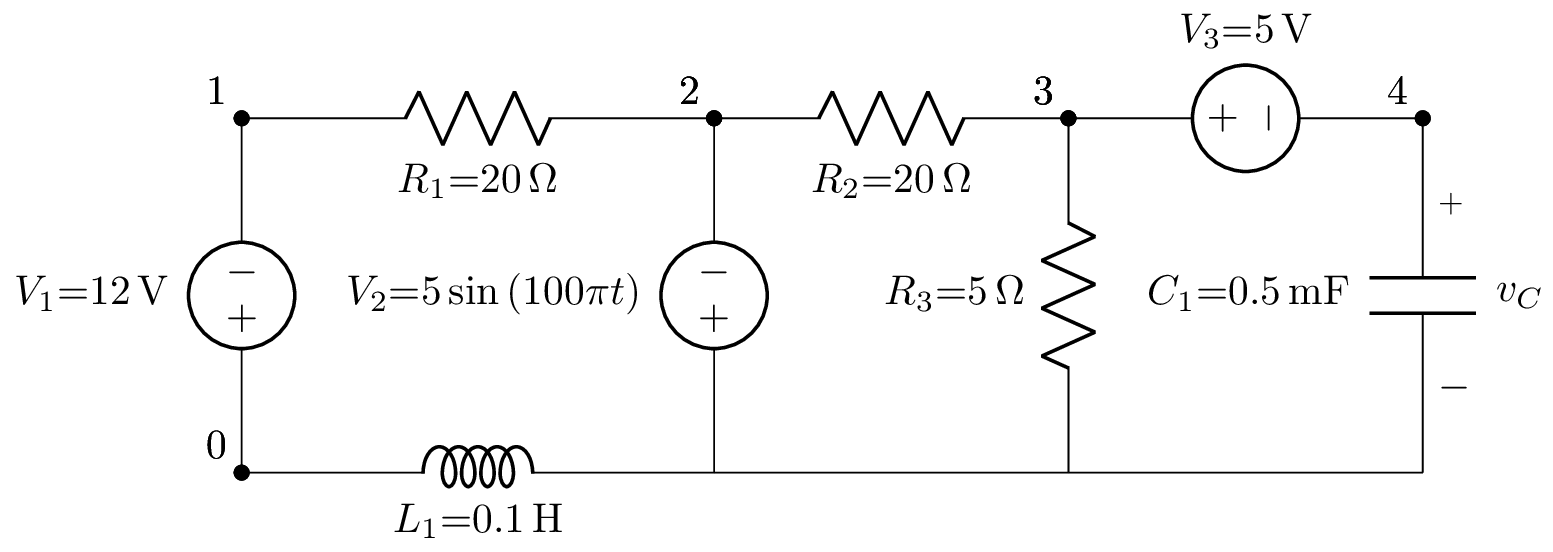

In [3]:
cct2 = Circuit("""
V1 1 0 12; down
L1 0 0_1 100e-3; right=2
R1 1 2 20; right=2
R2 2 3 20; right=1.5
V2 2 0_1 {5*sin(100*pi*t)}; down
R3 3 0_2 5; down=1.5
C1 4 0_3 500e-6; v=v_C, down=1.5
V3 4 3 5; left=1.5
W 0_2 0_3; right
W 0_1 0_2; right
""")
cct2.draw()

In [4]:
cct2i = cct2.initialize(cct1, 0)
#cct2i.L1.i.abs
#cct2i

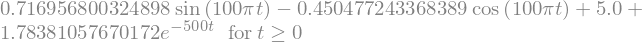

In [5]:
cct2i.C1.v.evalf()

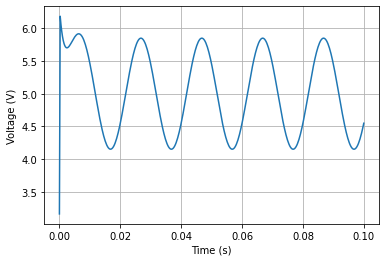

In [6]:
cct2i.C1.v.force_causal().plot((0, 0.1))

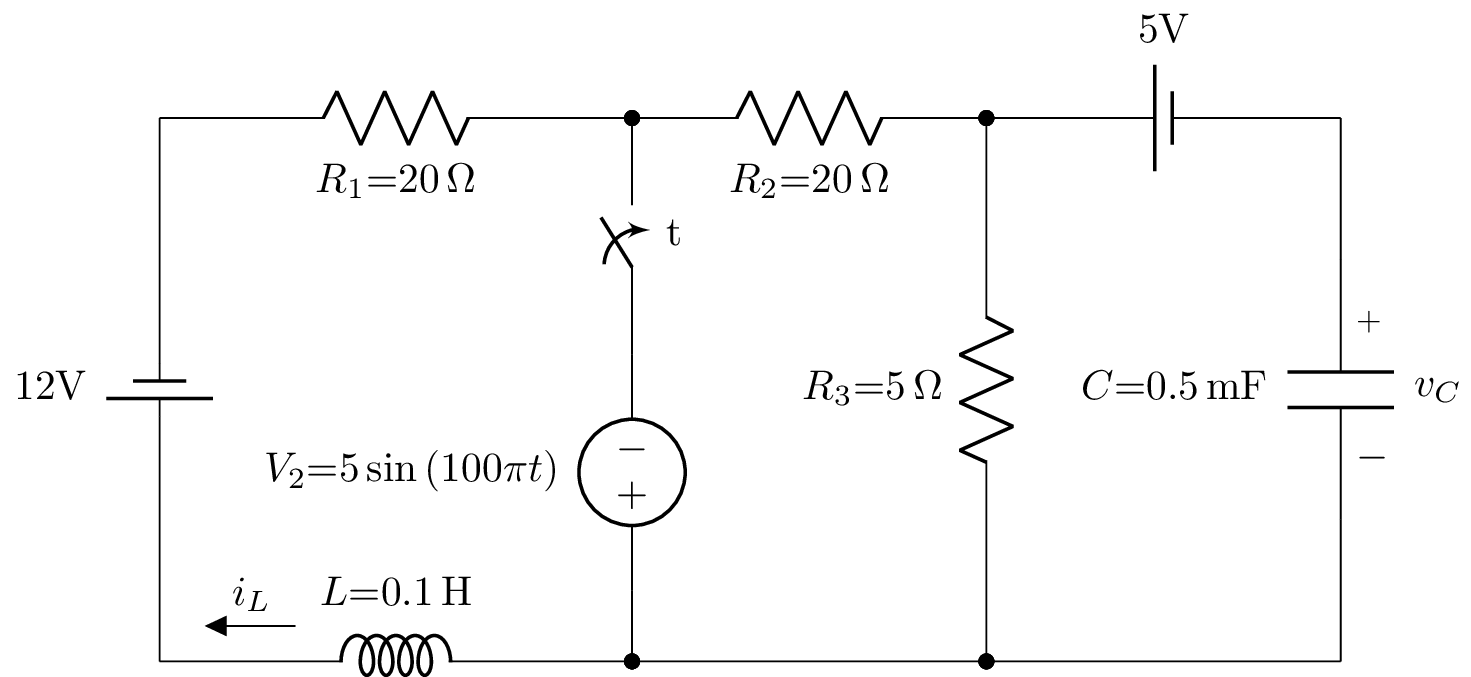

In [7]:
cct2drw = Circuit("""
BAT1 1 0 12; kind=cell1, l=12V, down
L 0_1 0 100e-3; left=2, f_=i_L, mirror
R1 1 2 20; right=1.5
R2 2 3 20; right=1.5
SW1 2_1 2 no; l=t=0, up
V2 2_1 2_2 {5*sin(100*pi*t)}; down
W 2_2 0_1; down=0.3
R3 3 0_2 5; down=1.5
W 4 4_1; down=0.5
C 4_1 4_2 500e-6; v=v_C, down
W 4_2 0_3; down=0.5
BAT2 4 3; kind=cell1, l=5V, left=1.5
W 0_2 0_3; right
W 0_1 0_2; right
; draw_nodes=connections, label_nodes=False
""")
cct2drw.draw()

sch='''
BAT1 1 0 12; kind=cell1, l=12V, down
L 0_1 0 100e-3; left=2, f_=i_L, mirror
R1 1 2 20; right=1.5
R2 2 3 20; right=1.5
SW1 2_1 2 no; l=t=0, up
V2 2_1 2_2 {5*sin(100*pi*t)}; down
W 2_2 0_1; down=0.3
R3 3 0_2 5; down=1.5
W 4 4_1; down=0.5
C 4_1 4_2 500e-6; v=v_C, down
W 4_2 0_3; down=0.5
BAT2 4 3; kind=cell1, l=5V, left=1.5
W 0_2 0_3; right
W 0_1 0_2; right
; draw_nodes=connections, label_nodes=False
'''
 
fn="ejU3.sch"
with open(fn, "w") as text_file:
    text_file.write(sch)
 
import os
os.system("schtex /content/ejU3.sch /content/ejU3.tex")